# Lighting setups

Each **Scene** has associated **lights**. The lights control how the objects in a scene is lit.

In [1]:
import fresnel
import math
import matplotlib, matplotlib.cm
from matplotlib import pyplot
%matplotlib inline
import numpy

device = fresnel.Device()
scene = fresnel.Scene(device)
position = []
for k in range(5):
    for i in range(5):
        for j in range(5):
            position.append([2*i, 2*j, 2*k])
geometry = fresnel.geometry.Sphere(scene, position = position, radius=1.0)
geometry.material = fresnel.material.Material(primitive_color_mix=1.0, color=(1,1,1))
mapper = matplotlib.cm.ScalarMappable(norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True),
                                      cmap = matplotlib.cm.get_cmap(name='viridis'))

v = numpy.linspace(0,1,len(position))
geometry.color[:] = fresnel.color.linear(mapper.to_rgba(v))
scene.camera = fresnel.camera.Orthographic.fit(scene, view='isometric')
tracer = fresnel.tracer.Path(device, w=450, h=450)

## Lighting presets

Fresnel defines many lighting presets that use classic photography techniques to light the scene. Create a setup and assign it to the Scene's lights.

The images in these examples are noisy because of the small number of samples. Increase the number of samples to obtain less noisy images.

### Light box
A light box lights the scene equally from all sides. This type of lighting is commonly used product photography.

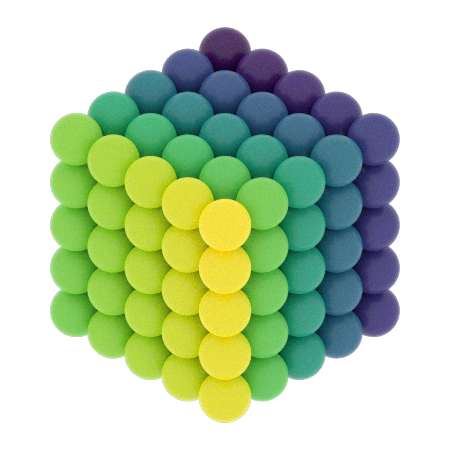

In [2]:
scene.lights = fresnel.light.lightbox()
tracer.sample(scene, samples=64, light_samples=10)

### Cloudy

Cloudy lighting mimics a cloudy day. Strong light comes from all directions above, while weak light comes from below.

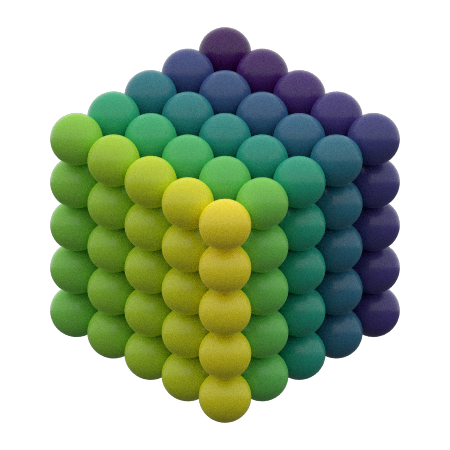

In [3]:
scene.lights = fresnel.light.cloudy()
tracer.sample(scene, samples=64, light_samples=10)

### Rembrandt

Rembrandt lighting places the key light 45 degrees to one side and slightly up.

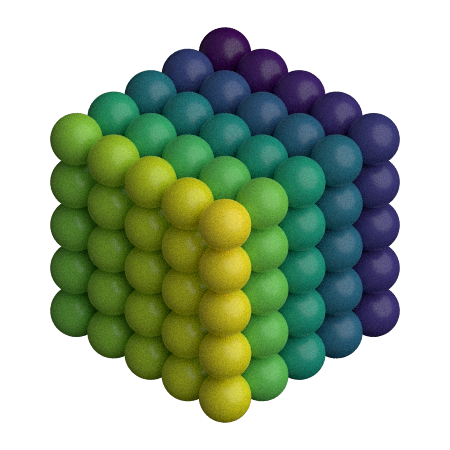

In [4]:
scene.lights = fresnel.light.rembrandt()
tracer.sample(scene, samples=64, light_samples=10)

Use the *side* argument specify which side to place the key light on.

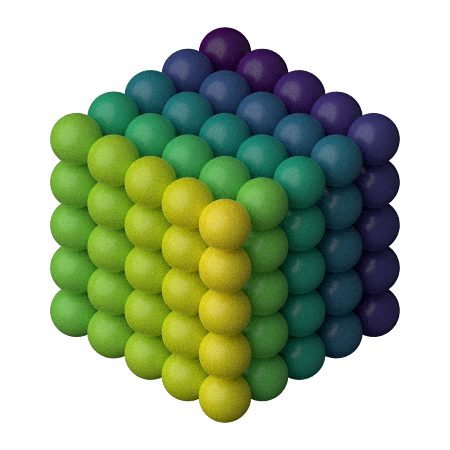

In [5]:
scene.lights = fresnel.light.rembrandt(side='left')
tracer.sample(scene, samples=64, light_samples=10)

### Loop lighting

Loop lighting places the key light slightly to one side and slightly up.

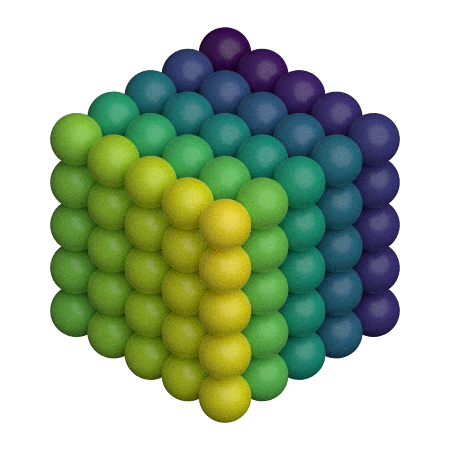

In [6]:
scene.lights = fresnel.light.loop()
tracer.sample(scene, samples=64, light_samples=10)

### Butterfly lighting

Butterfly lighting places the key light high above the camera.

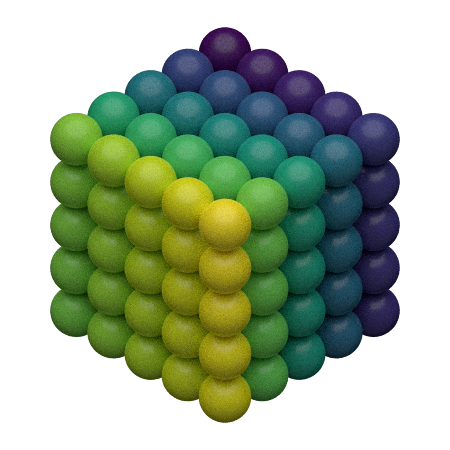

In [7]:
scene.lights = fresnel.light.butterfly()
tracer.sample(scene, samples=64, light_samples=10)

### Ring lighting

The ring lighting setup provides a strong front area light. This type of lighting is common
in fashion photography.

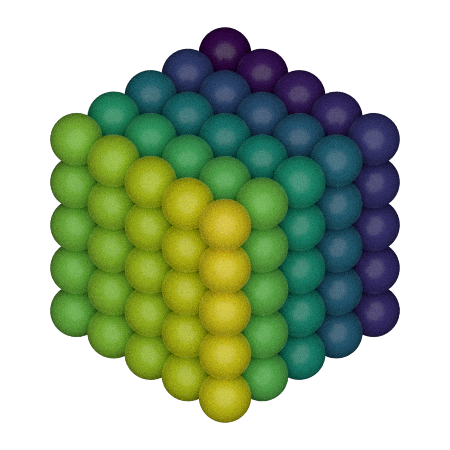

In [8]:
scene.lights = fresnel.light.ring()
tracer.sample(scene, samples=64, light_samples=10)

## Custom lights

You can define your own custom lights. Provide a *direction* vector pointing to the light in the coordinate system of the camera (+x points to the right, +y points up, and +z points out of the screen). The light color defines both the color (RGB) and the intensity of the light in a linear sRGB color space.

In [9]:
my_lights = [fresnel.light.Light(direction=(1,-1,1), color=(1,1,1))]
scene.lights = my_lights

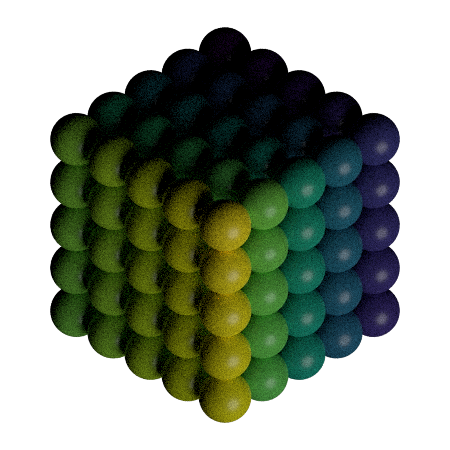

In [10]:
tracer.sample(scene, samples=64, light_samples=10)

The shadows are very dark. Add another light to fill them in. You can access the scene's lights directly. The value *theta* defines the half angle width of the light source. Large lights provide soft shadows.

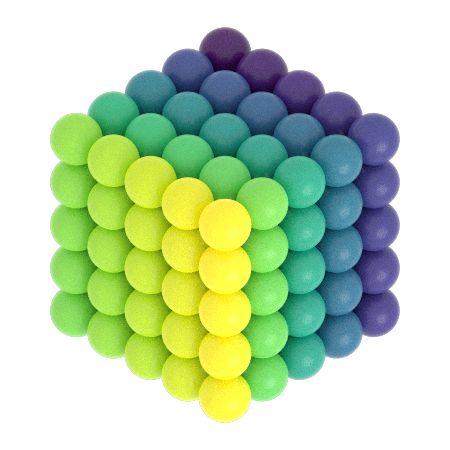

In [11]:
scene.lights.append(fresnel.light.Light(direction=(0,0,1), color=(1,1,1), theta=3.14))
tracer.sample(scene, samples=64, light_samples=10)

This image is overexposed.

Highlight warnings show overexposed areas of the image as a special color (default: magenta).

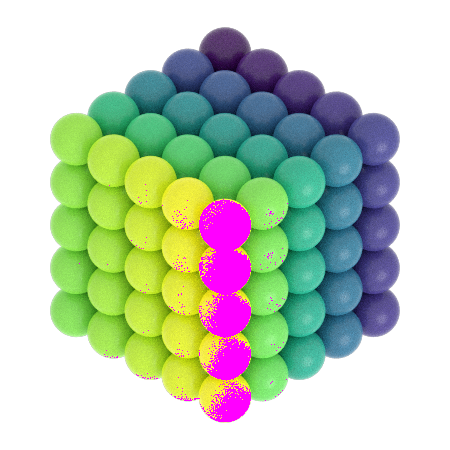

In [12]:
tracer.enable_highlight_warning()
tracer.render(scene)

If the histogram is blocking up at 1.0, there are overexposed highlights.

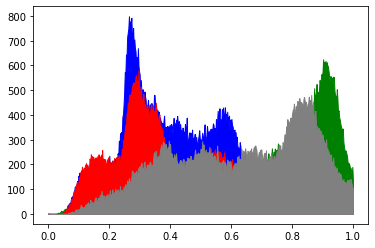

In [13]:
L, bins = tracer.histogram()
pyplot.fill_between(bins, L[:,3], color='blue');
pyplot.fill_between(bins, L[:,2], color='green');
pyplot.fill_between(bins, L[:,1], color='red');
pyplot.fill_between(bins, L[:,0], color='gray');

Reduce the intensity of the light to correctly expose the image.

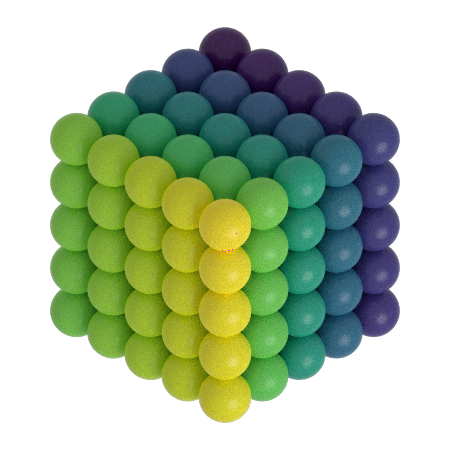

In [14]:
scene.lights[1].color=(0.45,0.45,0.45)
tracer.sample(scene, samples=64, light_samples=10)

Now there are no clipping warnings and the histogram shows a perfectly exposed image.

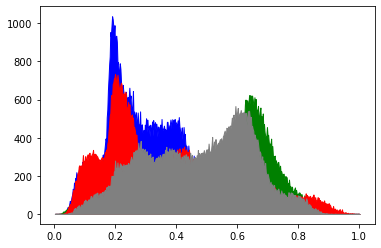

In [15]:
L, bins = tracer.histogram()
pyplot.fill_between(bins, L[:,3], color='blue');
pyplot.fill_between(bins, L[:,2], color='green');
pyplot.fill_between(bins, L[:,1], color='red');
pyplot.fill_between(bins, L[:,0], color='gray');

`scene.lights` has typical sequence like behavior. You can assign a sequence of Light objects to it, append lights to it, and loop over the lights in it. For example, reverse the direction of every light:

In [16]:
for l in scene.lights:
    d = l.direction;
    l.direction = (-d[0], -d[1], -d[2])

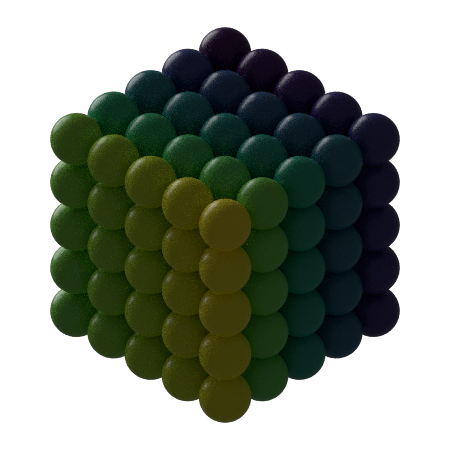

In [17]:
scene.lights[1].color=(0.05,0.05,0.05)
tracer.disable_highlight_warning()
tracer.sample(scene, samples=64, light_samples=10)

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://github.com/glotzerlab/fresnel-examples) repository.